In [5]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [6]:
delta = 1e-5
B = 1
lam = 1e-4
n_test = 10000
eps_list = [0.1, 0.3, 1.0]
n_list = [10000, 30000, 100000, 300000, 1000000, 3000000]
n_labels = [r"$10^4$", r"$3\times 10^4$", r"$10^5$", r"$3\times 10^5$", r"$10^6$", r"$3\times 10^6$"]
num_seed = 1000
d = 10
selected_labels_id = [5, 2, 3, 4]
fontsize = 50
labels = ["k=n^1/2 / (sigma)^1/2", "k=3 n^1/2 / (sigma)^1/2", "RMGM-OLS", "DGM-OLS", "BGM-OLS", "OLS"]
linestyles = ["dotted", "dotted", "solid", "dashed", "dashdot", "dotted", (0, (1, 1))]
# colors = ["b", "r", "#003f5c", "#7a5195", "#ef5675", "#ffa600", "b"]
colors = ["b", "r", "#4b7b9b", "#84aecc", "#bee4ff", "#004c6d", "b"]

marker_list = ["o", "o", "o", "v", "s", '*']
linewidth = 10
markersize = 30
sigma = ""
m = 5.0

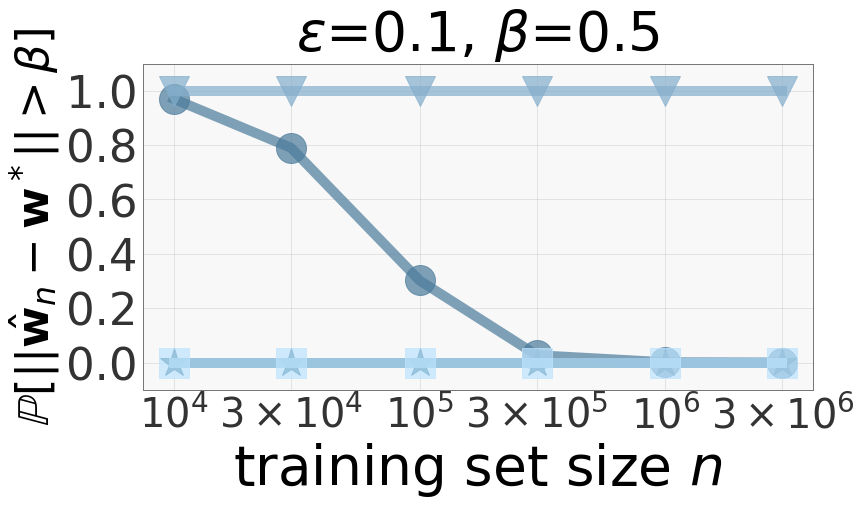

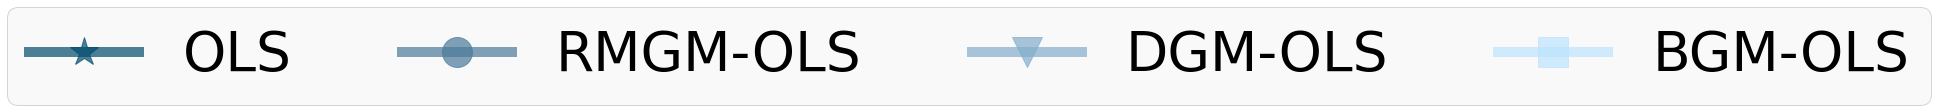

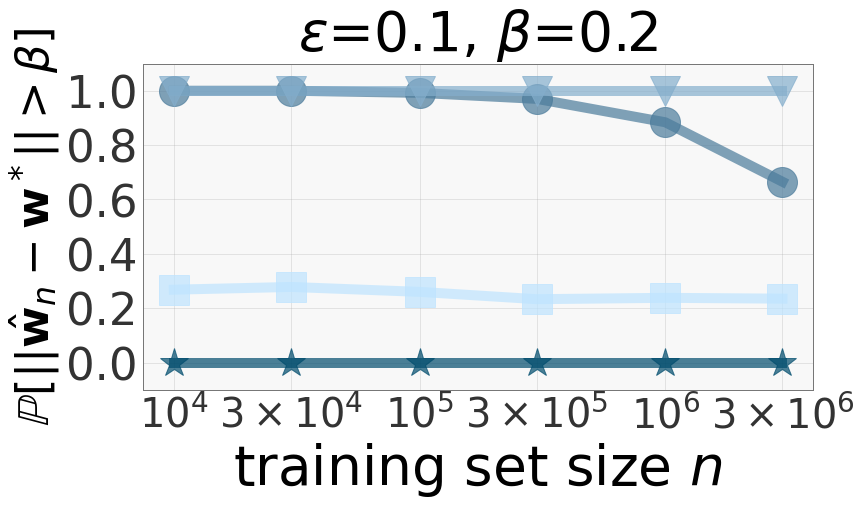

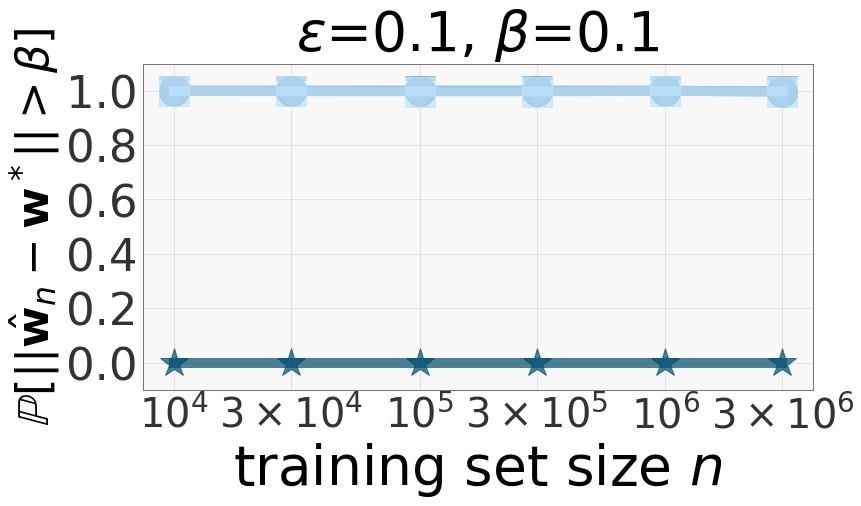

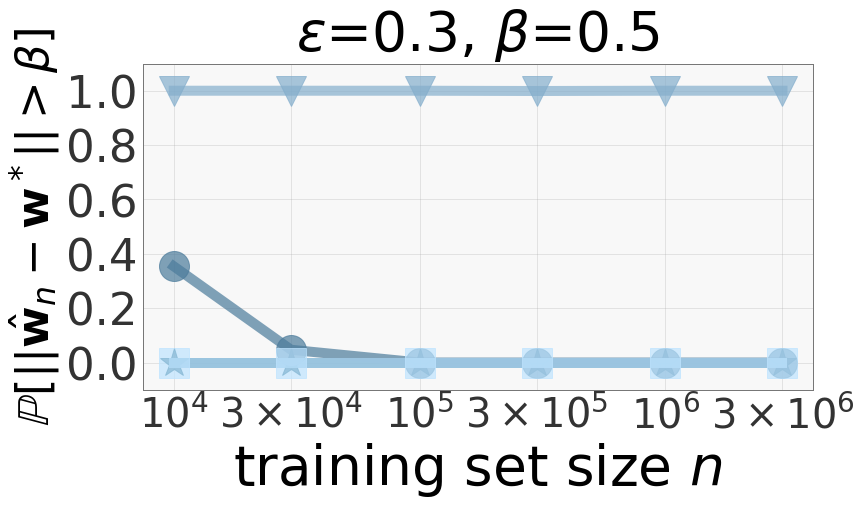

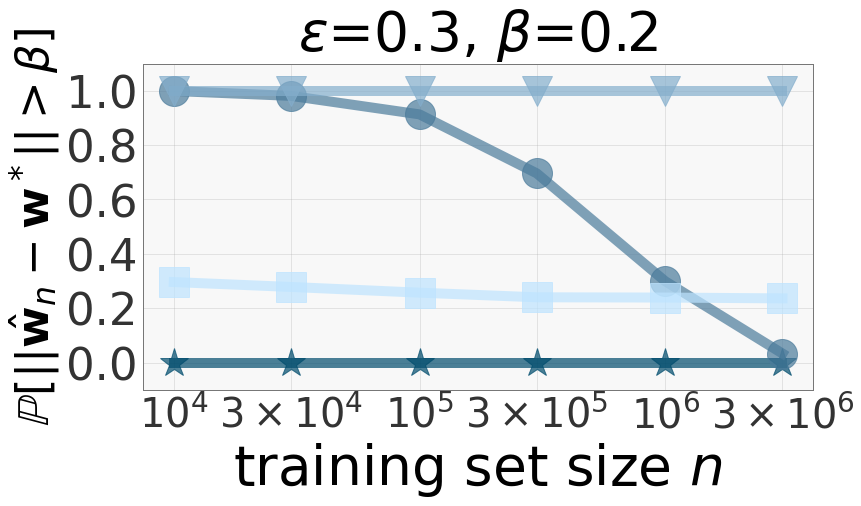

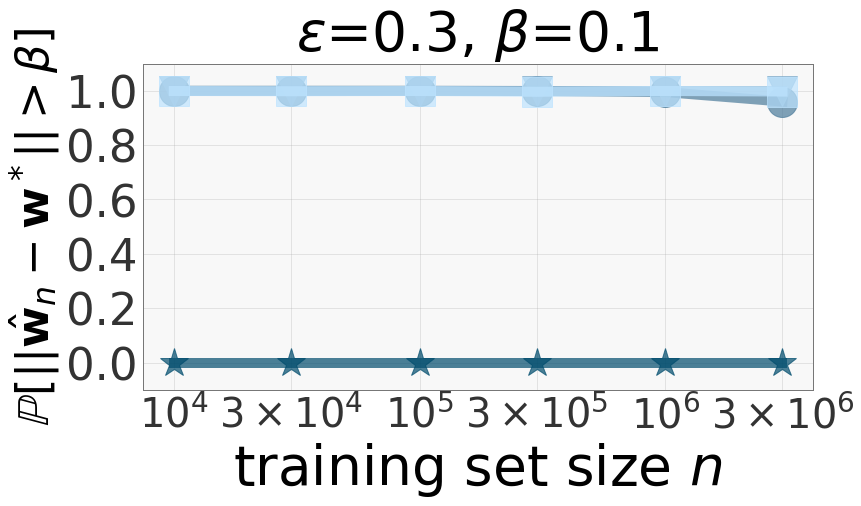

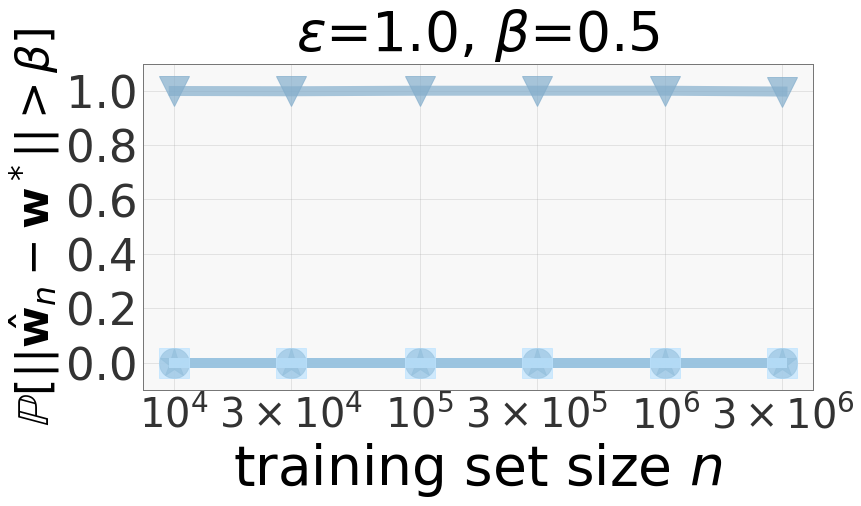

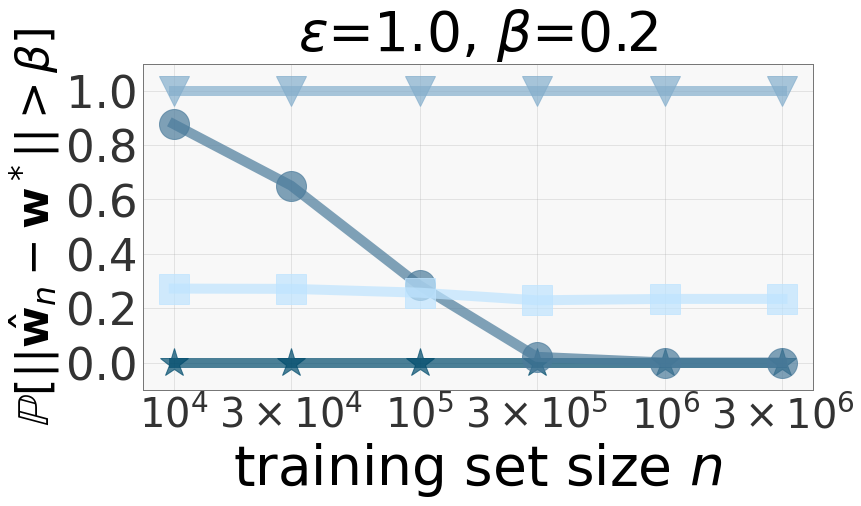

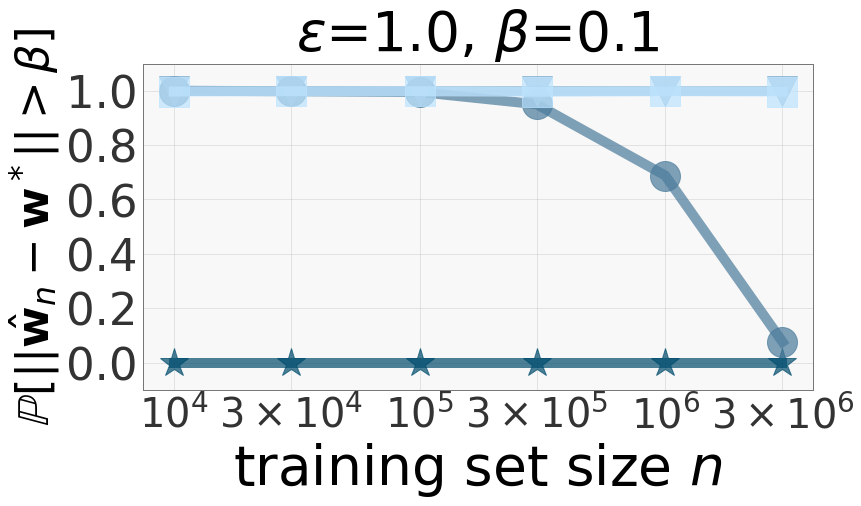

In [7]:
#draw the result - cdf of weight distance
threshold_list = [0.5, 0.2, 0.1]
legend = False
for eps in eps_list:
    results_path = f"private_linear_results_plot/multiparty_weight_distance_{eps}{sigma}_{m}.pth"
    if not os.path.exists(results_path):
#     if True:
        results = []
        for i in range(len(labels)):
            result = []
            for j in range(len(n_list)):
                result.append([])
            results.append(result)
        for ind_n, n in enumerate(n_list):
            test_losses_all_seed = []
            for seed in tqdm(range(num_seed)):
                try:
                    checkpoint = torch.load(f"private_linear_checkpoint/multiparty_private_linear_regression_CDF_{d}_{eps}_{n}{sigma}_{m}_{seed}.pth")
                    test_losses_all_seed.append(checkpoint["test_losses"])
                    del checkpoint
                except:
                    print(f"private_linear_checkpoint/multiparty_private_linear_regression_CDF_{d}_{eps}_{n}{sigma}_{m}_{seed}.pth")
                    continue
            for algo_i in range(len(labels)):
                loss_all_seed = np.asarray([test_losses[algo_i][1] for test_losses in test_losses_all_seed])
                results[algo_i][ind_n] = loss_all_seed
        torch.save(results, results_path)
        
    results = torch.load(results_path)
    for thr_i, threshold in enumerate(threshold_list):
        fig, ax = plt.subplots(figsize=(12, 6))
        for algo_i in selected_labels_id:
            ax.plot(n_list, [(results_algo > threshold).mean()  for results_algo in results[algo_i]], label=labels[algo_i], linestyle="solid", color=colors[algo_i], linewidth=linewidth, marker=marker_list[algo_i], markersize=markersize, alpha=0.7) #
        ax.set_xscale("log")
        ax.set_title(r"$\varepsilon$" + f"={eps}, " + r"$\beta$" + f"={threshold}", fontsize=fontsize+5)
#         ax.set_title(r"$\beta$" + f"={threshold}", fontsize=fontsize+5)
        plt.xticks(ticks=n_list, labels=n_labels, fontsize=fontsize-10) 
        plt.yticks(fontsize=fontsize-5) 
        ax.set_xlabel(r"training set size $n$", fontsize=fontsize+5)
        ax.set_ylabel(r"$\mathbb{P}[||\hat{\mathbf{w}}_n - \mathbf{w}^*||>\beta ]$", fontsize=fontsize-5)
        ax.set_ylim(-0.1, 1.1)
        plt.savefig(f"private_linear_results_plot/multiparty_weight_distance_beta_{eps}{sigma}_{threshold}.pdf", bbox_inches = 'tight')        
        
        if not legend:
            legend = True
            figsize = (10, 1)
            fig_leg = plt.figure(figsize=figsize)
            ax_leg = fig_leg.add_subplot(111)
            ax_leg.legend(*ax.get_legend_handles_labels(), loc='center', ncol=4, fontsize=fontsize+5)
            ax_leg.axis('off')
            fig_leg.savefig('private_linear_results_plot/multiparty_legend.pdf', bbox_inches = 'tight')
    
    

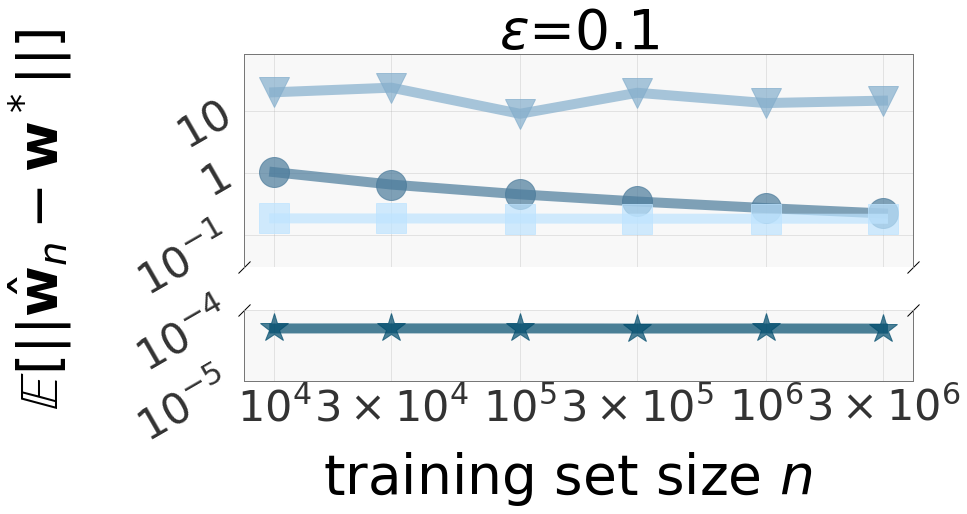

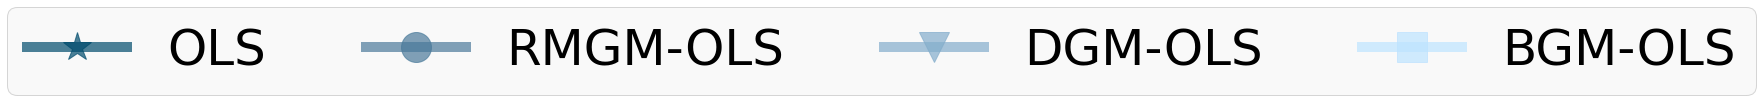

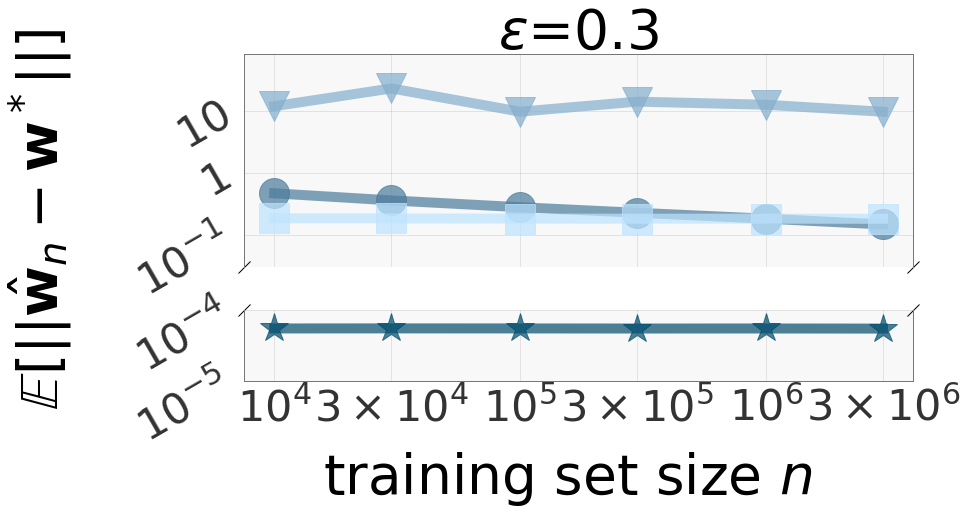

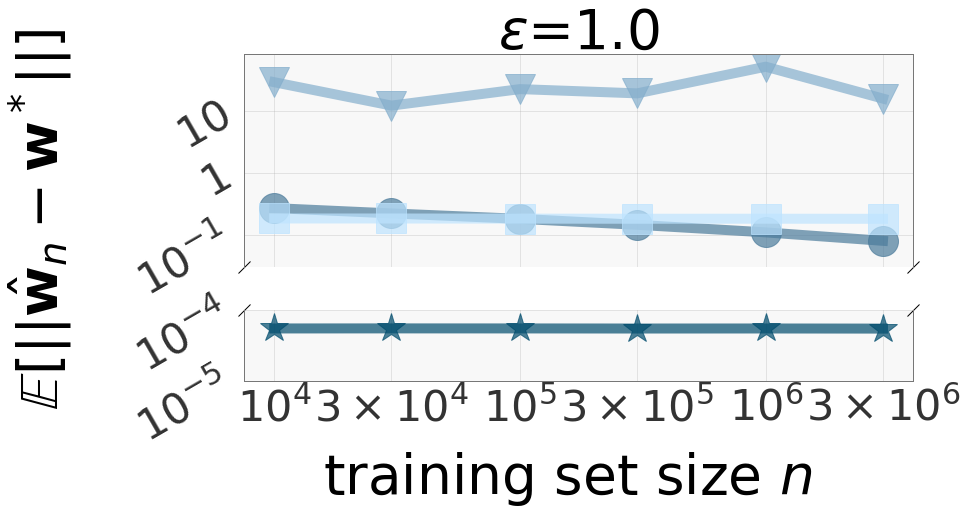

In [8]:
#draw the result - expected weight distance
# threshold_list = [0.5, 0.3, 0.1, 0.03, 0.01]
legend = False
for eps in eps_list:
    results_path = f"private_linear_results_plot/multiparty_weight_distance_{eps}{sigma}_{m}.pth"
    if not os.path.exists(results_path):
#     if True:
        results = []
        for i in range(len(labels)):
            result = []
            for j in range(len(n_list)):
                result.append([])
            results.append(result)
        for ind_n, n in enumerate(n_list):
            test_losses_all_seed = []
            for seed in tqdm(range(num_seed)):
                try:
                    checkpoint = torch.load(f"private_linear_checkpoint//multiparty_private_linear_regression_CDF_{d}_{eps}_{n}{sigma}_{m}_{seed}.pth")
                    test_losses_all_seed.append(checkpoint["test_losses"])
                    del checkpoint
                except:
                    continue
            for algo_i in range(len(labels)):
                loss_all_seed = np.asarray([test_losses[algo_i][1] for test_losses in test_losses_all_seed])
    #             print(len(loss_all_seed))
                results[algo_i][ind_n] = loss_all_seed
        torch.save(results, results_path)
        
    results = torch.load(results_path)

    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6), gridspec_kw={'height_ratios': [3, 1]})
    fig.subplots_adjust(hspace=0.3) 
    for algo_i in selected_labels_id:
        ax1.plot(n_list, [results_algo.mean()  for results_algo in results[algo_i]], label=labels[algo_i], linestyle="solid", color=colors[algo_i], linewidth=linewidth, marker=marker_list[algo_i], markersize=markersize, alpha=0.7) #
        ax2.plot(n_list, [results_algo.mean()  for results_algo in results[algo_i]], label=labels[algo_i], linestyle="solid", color=colors[algo_i], linewidth=linewidth, marker=marker_list[algo_i], markersize=markersize, alpha=0.7) #
    
    for ax in [ax1, ax2]:
        ax.set_yscale("log")
        ax.set_xscale("log")
    
    ax1.set_yticks([1e-1, 1, 10])
    ax1.set_yticklabels([r"$10^{-1}$", r"$1$", r"$10$"], fontsize=fontsize-7, rotation=30)
    ax2.set_yticks([1e-5, 1e-4])
    ax2.set_yticklabels([r"$10^{-5}$", r"$10^{-4}$"], fontsize=fontsize-7, rotation=30)

    #     ax2.set_yticklabels(, fontsize=fontsize-7)
      
#     ax2.tick_params(axis='x', labelsize=fontsize-7)
    ax2.set_xticks(n_list)
    ax2.set_xticklabels(n_labels, fontsize=fontsize-7)
    
    ax1.set_title(r"$\varepsilon$" + f"={eps}", fontsize=fontsize+5)
    ax1.spines["bottom"].set_visible(False)
    ax2.spines["top"].set_visible(False)
#     ax1.xaxis.tick_top()
#     ax1.tick_params(labeltop=False)  # don't put tick labels at the top
#     ax2.xaxis.tick_bottom()
    
    ax1.set_ylim(3e-2, 80)
    ax2.set_ylim(1e-5, 1e-4)
    
    fig.text(0.5,-0.1, r"training set size $n$", ha="center", va="center", fontsize=fontsize+5)
    fig.text(-0.11,0.5, r"$\mathbb{E}[||\hat{\mathbf{w}}_n - \mathbf{w}^*||]$", ha="center", va="center", rotation=90, fontsize=fontsize+5)
    
    
    dm = 1.0  # proportion of vertical to horizontal extent of the slanted line
    kwargs = dict(marker=[(-1, -dm), (1, dm)], markersize=12,
                  linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
    ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
    
#         plt.tight_layout()
#         plt.show()

    plt.minorticks_off()
    plt.savefig(f"private_linear_results_plot/multiparty_private_weight_distance_expected_{eps}{sigma}.pdf", bbox_inches = 'tight')

    if not legend:
        legend = True
        figsize = (10, 1)
        fig_leg = plt.figure(figsize=figsize)
        ax_leg = fig_leg.add_subplot(111)
        ax_leg.legend(*ax1.get_legend_handles_labels(), loc='center', ncol=4, fontsize=fontsize)
        ax_leg.axis('off')
        fig_leg.savefig('private_linear_results_plot/multiparty_private_legend_expected.pdf', bbox_inches = 'tight')
    